In [83]:
# 필요한 라이브러리 임포트
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [84]:
# (1) 데이터 가져오기 
# 당뇨병 데이터셋 로드
diabetes_data = load_diabetes()

In [85]:
# diabetes의 data를 df_X에, target을 df_y에 저장해주세요.

df_X = pd.DataFrame(data = diabetes_data.data, columns=diabetes_data.feature_names)
df_y = pd.DataFrame(diabetes_data.target)

print(df_X.head())
print(df_y.head())

print(df_X.shape)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641  
       0
0  151.0
1   75.0
2  141.0
3  206.0
4  135.0
(442, 10)


In [86]:
# (2) 모델에 입력할 데이터 X 준비하기
# df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
X = df_X.values
print (X.shape)

(442, 10)


In [87]:
# (3) 모델에 예측할 데이터 y준비하기
# df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
y = df_y.values.ravel() #
print (y.shape)

(442,)


In [88]:
# (4) train 데이터와 test 데이터로 분리
# X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분리된 데이터 크기 출력
print("Training data size:", X_train.shape[0])
print("Testing data size:", X_test.shape[0])

Training data size: 353
Testing data size: 89


In [92]:
# (5) 모델 준비하기
# 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
import numpy as np

W = np.random.rand(10)
b = 0.5


# 모델 함수정의하기
def model(X_train, W, b):
    predictions = 0
    for i in range(10):
        predictions += X_train[:, i] * W[i]
    predictions += b
    return predictions

In [93]:
# (6) 손실함수를 MSE 함수로 정의해주세요.

# MSE 함수정의
def MSE(a, b):
    mse = ((a-b)**2).mean() # 예측값과 실제값의 차의 제곱의 평균을 구해준다
    return mse

# 손실함수정의
def loss(X_train, W, b, y_train):
    predictions = model(X_train, W, b)
    L = MSE(predictions, y_train)
    return L


In [94]:
# (7)기울기를 계산하는 gradient 함수를 구현해주세요.

def gradient(X_train, W, b, y_train):
    # 예측값 계산
    y_pred = X_train.dot(W) + b  # y_pred의 shape은 (샘플 수,)
    
    # 오차 계산
    error = y_pred - y_train  # error의 shape은 (샘플 수,)
    
    # dW와 db 계산
    dW = (1 / len(y_train)) * X_train.T.dot(error)  # dW의 shape은 (특성 수,)
    db = (1 / len(y_train)) * np.sum(error)  # db는 스칼라
    #print(len(error))
    return dW, db

# gradient 계산
dW, db = gradient(X_train, W, b, y_train)
print(dW.shape)
#print(X.T.shape)

print("db:", db)

(10,)
db: -153.23245405708676


In [95]:
#(8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 1 #가장 일반적인 비율 적용 0.0001 

In [96]:
# (9) 모델 학습하기

# 손실함수와 기울기 함수를 적용하여 모델 학습하기

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 5690.8331
Iteration 20 : Loss 5375.1907
Iteration 30 : Loss 5104.7321
Iteration 40 : Loss 4872.3340
Iteration 50 : Loss 4672.0337
Iteration 60 : Loss 4498.8381
Iteration 70 : Loss 4348.5640
Iteration 80 : Loss 4217.7048
Iteration 90 : Loss 4103.3197
Iteration 100 : Loss 4002.9402
Iteration 110 : Loss 3914.4934
Iteration 120 : Loss 3836.2368
Iteration 130 : Loss 3766.7041
Iteration 140 : Loss 3704.6606
Iteration 150 : Loss 3649.0652
Iteration 160 : Loss 3599.0389
Iteration 170 : Loss 3553.8384
Iteration 180 : Loss 3512.8346
Iteration 190 : Loss 3475.4937
Iteration 200 : Loss 3441.3620
Iteration 210 : Loss 3410.0533
Iteration 220 : Loss 3381.2377
Iteration 230 : Loss 3354.6331
Iteration 240 : Loss 3329.9976
Iteration 250 : Loss 3307.1228
Iteration 260 : Loss 3285.8290
Iteration 270 : Loss 3265.9607
Iteration 280 : Loss 3247.3826
Iteration 290 : Loss 3229.9769
Iteration 300 : Loss 3213.6404
Iteration 310 : Loss 3198.2826
Iteration 320 : Loss 3183.8234
Iteration 330 : L

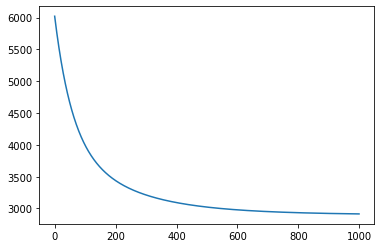

In [97]:
# loss값이 충분히 떨어지는지 확인
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다

In [98]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print("슝=3")

슝=3


In [99]:
model.fit(X_train, y_train)

LinearRegression()

In [100]:
predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

In [101]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

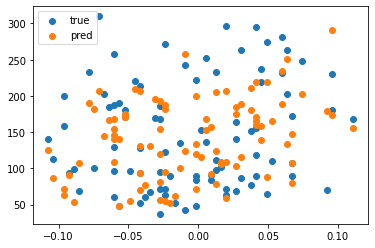

In [102]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()